SUPPLY CHAIN NAVIGATOR

In [43]:
! pip install pandas numpy matplotlib seaborn

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data (Extraction)
df = pd.read_csv('DescriptionDataCoSupplyChain.csv')

In [45]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')


In [46]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [47]:
columns_needed = ['Product Name', 'Sales per customer', 'Category Name', 'Customer City', 
                  'Delivery Status', 'Days for shipping (real)', 'Late_delivery_risk', 
                  'Shipping Mode', 'shipping date (DateOrders)']
df_filtered = df[columns_needed]

# Check the shape of the extracted data
print(f"Extracted data contains {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns.")

Extracted data contains 180519 rows and 9 columns.


In [48]:
missing_values = df_filtered.isnull().sum()

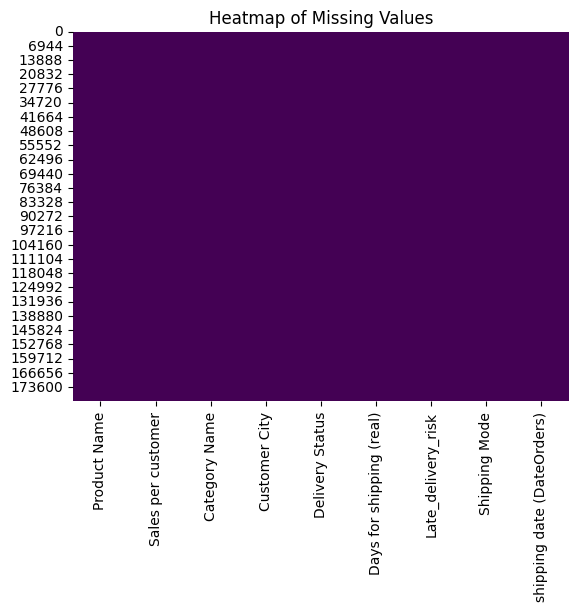

In [49]:
sns.heatmap(df_filtered.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

In [50]:
df_filtered.dropna(inplace=True)   # Dropping rows with missing values

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_24336\2325608869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)   # Dropping rows with missing values


In [51]:

df_filtered['shipping date (DateOrders)'] = pd.to_datetime(df_filtered['shipping date (DateOrders)'], errors='coerce')




C:\Users\Hp-D\AppData\Local\Temp\ipykernel_24336\3968240908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['shipping date (DateOrders)'] = pd.to_datetime(df_filtered['shipping date (DateOrders)'], errors='coerce')


In [52]:
df_filtered.dtypes

Product Name                          object
Sales per customer                   float64
Category Name                         object
Customer City                         object
Delivery Status                       object
Days for shipping (real)               int64
Late_delivery_risk                     int64
Shipping Mode                         object
shipping date (DateOrders)    datetime64[ns]
dtype: object

In [53]:
# Check for duplicates
duplicates = df_filtered.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")





Number of duplicate rows: 10


In [54]:
df_filtered.drop_duplicates(inplace=True)

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_24336\2500908631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)


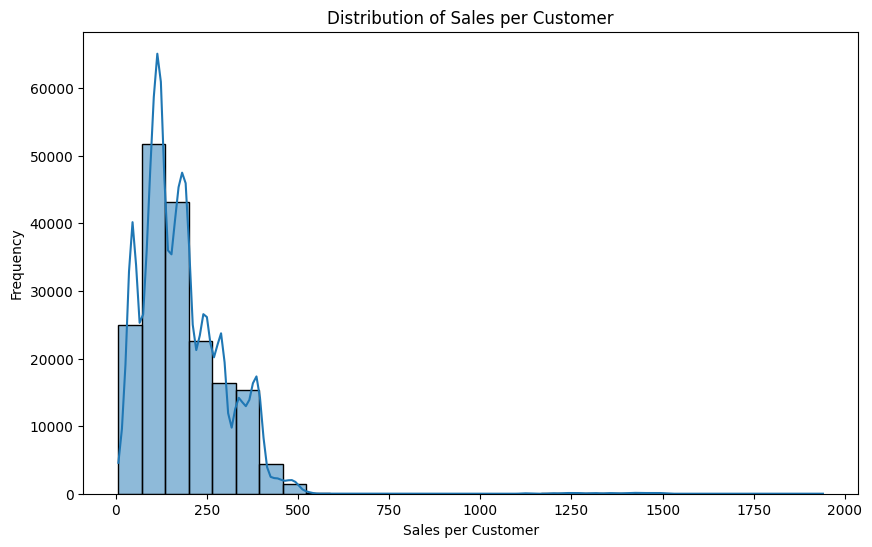

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Sales per customer'], bins=30, kde=True)
plt.title('Distribution of Sales per Customer')
plt.xlabel('Sales per Customer')
plt.ylabel('Frequency')
plt.show()

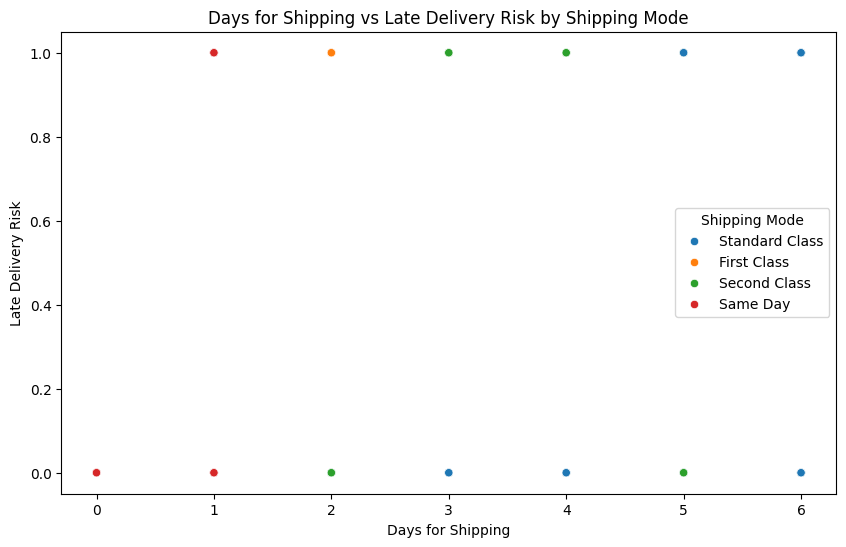

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days for shipping (real)', y='Late_delivery_risk', data=df_filtered, hue='Shipping Mode')
plt.title('Days for Shipping vs Late Delivery Risk by Shipping Mode')
plt.xlabel('Days for Shipping')
plt.ylabel('Late Delivery Risk')
plt.show()

In [57]:
# Save the cleaned data to a CSV file
df_filtered.to_csv('cleaned_supply_chain_data.csv', index=False)


Dimensional modelling and data normailization

In [58]:
# Create separate dimensional tables (Dimensions) for product and customer
product_dim = df_filtered[['Product Name', 'Category Name']].drop_duplicates().reset_index(drop=True)
customer_dim = df_filtered[['Customer City']].drop_duplicates().reset_index(drop=True)


print("Product Dimension Table")
print(product_dim.head())


Product Dimension Table
                                    Product Name    Category Name
0                                   Smart watch    Sporting Goods
1               Perfect Fitness Perfect Rip Deck           Cleats
2  Under Armour Girls' Toddler Spine Surge Runni    Shop By Sport
3           Nike Men's Dri-FIT Victory Golf Polo  Women's Apparel
4     Under Armour Men's Compression EV SL Slide      Electronics


In [59]:

print("\nCustomer Dimension Table")
print(customer_dim.head())


Customer Dimension Table
  Customer City
0        Caguas
1      San Jose
2   Los Angeles
3     Tonawanda
4         Miami


data normalization

In [60]:

df_normalized = df_filtered.merge(product_dim, on='Product Name', how='left')
df_normalized = df_normalized.merge(customer_dim, on='Customer City', how='left')

# Final normalized dataset
print(df_normalized.head())


   Product Name  Sales per customer Category Name_x Customer City  \
0  Smart watch           314.640015  Sporting Goods        Caguas   
1  Smart watch           311.359985  Sporting Goods        Caguas   
2  Smart watch           309.720001  Sporting Goods      San Jose   
3  Smart watch           304.809998  Sporting Goods   Los Angeles   
4  Smart watch           298.250000  Sporting Goods        Caguas   

    Delivery Status  Days for shipping (real)  Late_delivery_risk  \
0  Advance shipping                         3                   0   
1     Late delivery                         5                   1   
2  Shipping on time                         4                   0   
3  Advance shipping                         3                   0   
4  Advance shipping                         2                   0   

    Shipping Mode shipping date (DateOrders) Category Name_y  
0  Standard Class        2018-02-03 22:56:00  Sporting Goods  
1  Standard Class        2018-01-18 12:27:00

In [61]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180509 entries, 0 to 180508
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Product Name                180509 non-null  object        
 1   Sales per customer          180509 non-null  float64       
 2   Category Name_x             180509 non-null  object        
 3   Customer City               180509 non-null  object        
 4   Delivery Status             180509 non-null  object        
 5   Days for shipping (real)    180509 non-null  int64         
 6   Late_delivery_risk          180509 non-null  int64         
 7   Shipping Mode               180509 non-null  object        
 8   shipping date (DateOrders)  180509 non-null  datetime64[ns]
 9   Category Name_y             180509 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 13.8+ MB


C:\Users\Hp-D\AppData\Local\Temp\ipykernel_24336\545744009.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category Name_y', y='Sales per customer', data=df_normalized, ci=None)


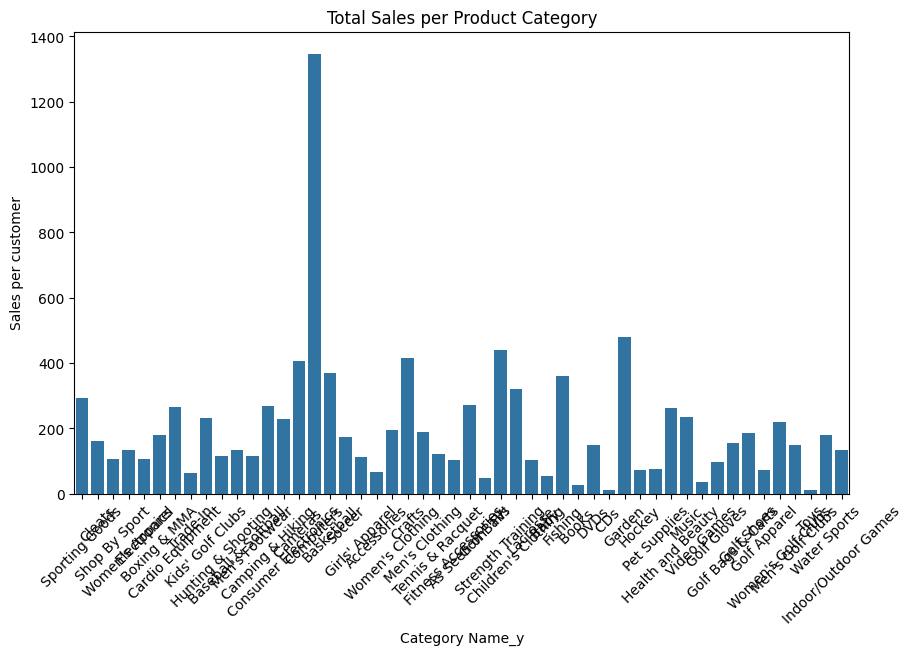

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Category Name_y', y='Sales per customer', data=df_normalized, ci=None)
plt.title('Total Sales per Product Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hp-D\AppData\Local\Temp\ipykernel_24336\2946297854.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer City', y='Sales per customer', data=top_customers, ci=None)


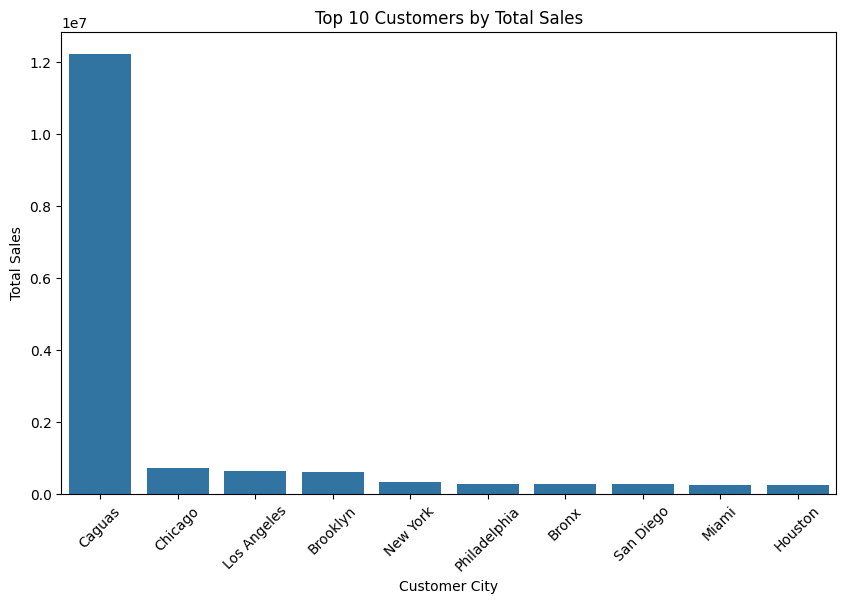

In [63]:
# Calculate total sales by customer
customer_sales = df_normalized.groupby('Customer City')['Sales per customer'].sum().reset_index()

# Sort customers by total sales
top_customers = customer_sales.sort_values(by='Sales per customer', ascending=False).head(10)

# Visualize the top customers by total sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer City', y='Sales per customer', data=top_customers, ci=None)
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()


customer segmentation
using k means clustering

In [67]:
! pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.0 MB 6.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.0 MB 6.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 5.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 6.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.1 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 3.1/44.5 MB 20.6 MB/s

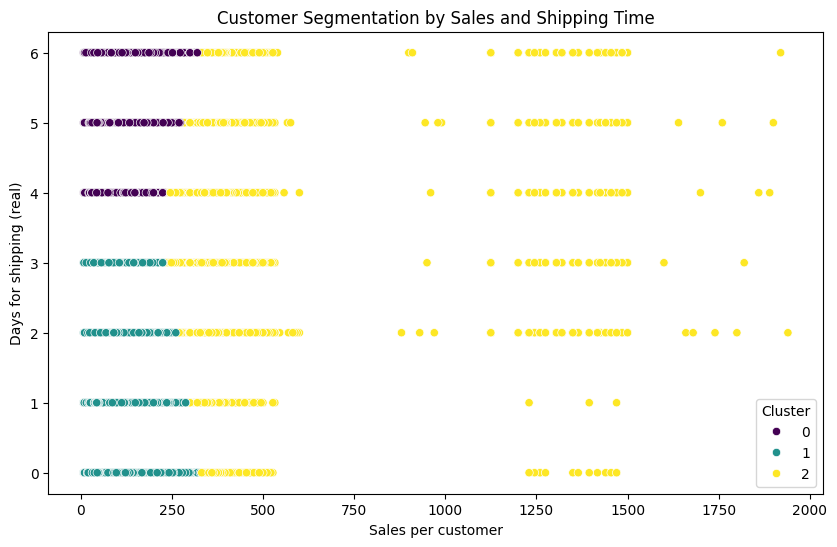

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_data = df_normalized[['Sales per customer', 'Days for shipping (real)']].copy()
clustering_data = clustering_data.dropna()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales per customer', y='Days for shipping (real)', hue='Cluster', data=clustering_data, palette='viridis')
plt.title('Customer Segmentation by Sales and Shipping Time')
plt.show()


Seasonality Analysis

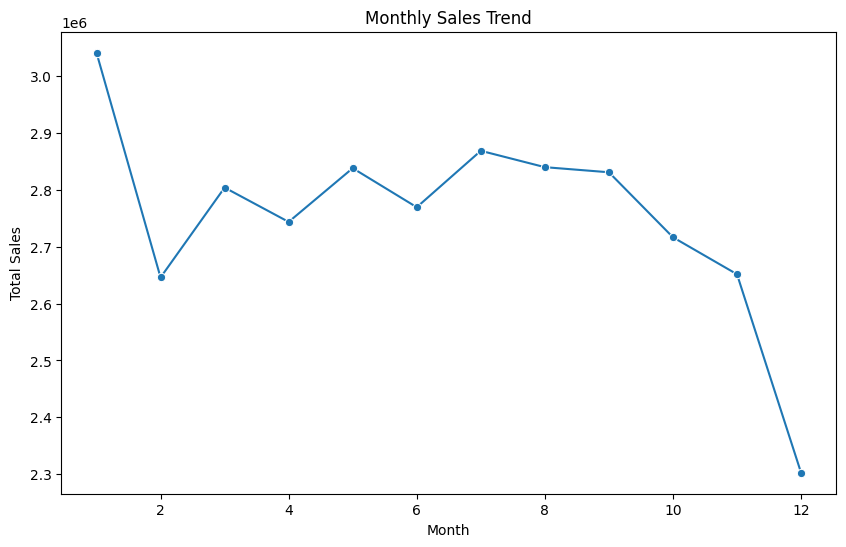

In [69]:
# Extract month from 'shipping date (DateOrders)'
df_normalized['Month'] = df_normalized['shipping date (DateOrders)'].dt.month

# Group sales by month
monthly_sales = df_normalized.groupby('Month')['Sales per customer'].sum().reset_index()

# Visualize monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales per customer', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



Kpi IMPLEMENTATION

1.Total Sales (KPI)

In [71]:
total_sales = df_normalized['Sales per customer'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 33052362.68020452


 2. Order Fulfillment Cycle Time (KPI)

In [73]:
avg_fulfillment_time = df_normalized['Days for shipping (real)'].mean()
print(f"Average Fulfillment Cycle Time: {avg_fulfillment_time} days")


Average Fulfillment Cycle Time: 3.497609537474586 days


3. On-Time Delivery Rate (KPI)

In [72]:
on_time_delivery_rate = 1 - df_normalized['Late_delivery_risk'].mean()
print(f"On-Time Delivery Rate: {on_time_delivery_rate * 100}%")

On-Time Delivery Rate: 45.17226287885923%


5. Top Products by Sales (KPI)

In [75]:
top_products = df_normalized.groupby('Product Name')['Sales per customer'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:")
print(top_products)

Top 5 Products by Sales:
Product Name
Field & Stream Sportsman 16 Gun Fire Safe        6.226935e+06
Perfect Fitness Perfect Rip Deck                 3.972161e+06
Diamondback Women's Serene Classic Comfort Bi    3.700784e+06
Nike Men's Free 5.0+ Running Shoe                3.295293e+06
Nike Men's Dri-FIT Victory Golf Polo             2.828358e+06
Name: Sales per customer, dtype: float64


6. Top Customers by Sales (KPI)

In [76]:
top_customers = df_normalized.groupby('Customer City')['Sales per customer'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Sales:")
print(top_customers)

Top 5 Customers by Sales:
Customer City
Caguas         1.222604e+07
Chicago        7.153755e+05
Los Angeles    6.269430e+05
Brooklyn       6.084122e+05
New York       3.246187e+05
Name: Sales per customer, dtype: float64


time-series forecasting with moving average 

In [85]:
print(df.columns)


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

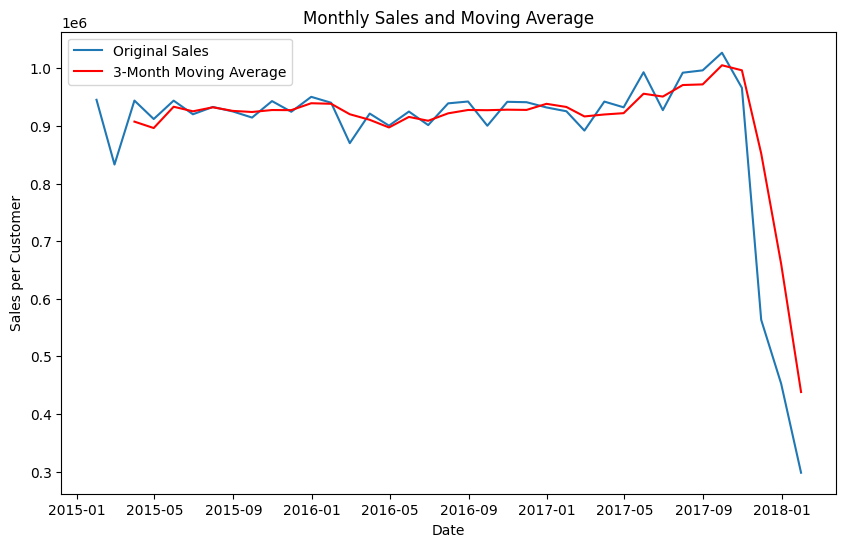

Predicted sales for the next month: 438029.0173235053


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust path to your file)

# Check the column names to verify the date column
print(df.columns)

# Convert 'order date (DateOrders)' to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Remove rows where the date couldn't be converted (if any)
df = df.dropna(subset=['order date (DateOrders)'])

# Set the 'order date (DateOrders)' as the index for easier time series analysis
df.set_index('order date (DateOrders)', inplace=True)

# Check if 'Sales per customer' exists, and print the first few rows
print(df[['Sales per customer']].head())

# Resample the data to monthly sales
monthly_sales = df.resample('M').sum()['Sales per customer']

# Calculate a 3-month moving average to smooth the sales data
monthly_sales_ma = monthly_sales.rolling(window=3).mean()

# Visualize the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Original Sales')
plt.plot(monthly_sales_ma.index, monthly_sales_ma, label='3-Month Moving Average', color='red')
plt.title('Monthly Sales and Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales per Customer')
plt.legend()
plt.show()

# Predict the next period's sales (simplified method)
next_period_sales = monthly_sales_ma.iloc[-1]
print(f"Predicted sales for the next month: {next_period_sales}")


Predicted sales for the next period (using Linear Regression): 179.4266596322268


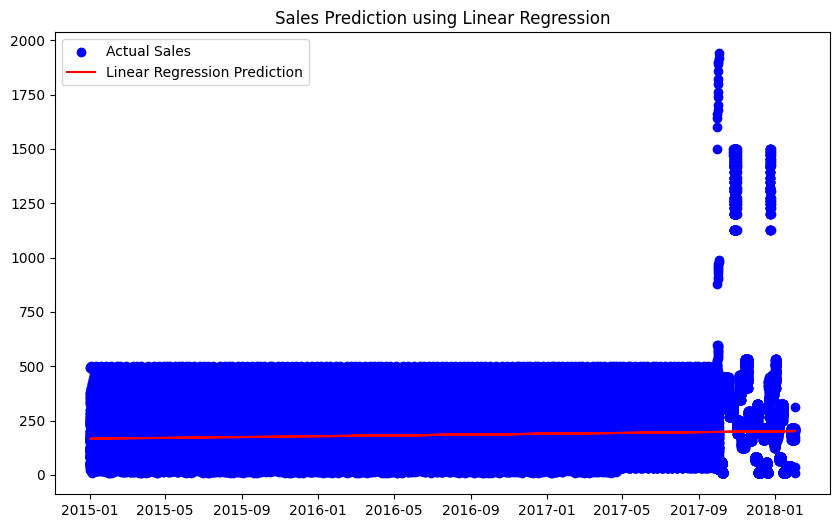

In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a new column for the time period (convert dates to ordinal values)
df['Date_Ordinal'] = df.index.map(lambda date: date.toordinal())

# Prepare data for regression
X = np.array(df['Date_Ordinal']).reshape(-1, 1)  # Features (Date in ordinal format)
y = df['Sales per customer']  # Target (Sales)

# Perform Linear Regression
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predict sales for the next month
next_period_ordinal = df.index[-1].toordinal() + 30  # Assuming we want to predict 30 days ahead
predicted_sales = reg_model.predict([[next_period_ordinal]])

print(f"Predicted sales for the next period (using Linear Regression): {predicted_sales[0]}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sales per customer'], label='Actual Sales', color='blue')
plt.plot(df.index, reg_model.predict(X), label='Linear Regression Prediction', color='red')
plt.title('Sales Prediction using Linear Regression')
plt.legend()
plt.show()
